In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the files
df= pd.read_csv("C:\\Users\\Swayam\\Desktop\\Abhinab Chakraborty_CU23MSD001A\\Abhinab Chakraborty_CU23MSD001A\\white_wine_data_semi colon sep.csv")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [3]:
#Counting the occurence of each quality in the dataset
print('n_3= ',df['quality'][df['quality']==3].count())
print('n_4= ',df['quality'][df['quality']==4].count())
print('n_5= ',df['quality'][df['quality']==5].count())
print('n_6= ',df['quality'][df['quality']==6].count())
print('n_7= ',df['quality'][df['quality']==7].count())
print('n_8= ',df['quality'][df['quality']==8].count())
print('n_9= ',df['quality'][df['quality']==9].count())

n_3=  20
n_4=  163
n_5=  1457
n_6=  2198
n_7=  880
n_8=  175
n_9=  5


In [4]:
#Function to plot box plot for each features
def plot_boxplots(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize= (20,5))
    for i, column_name in enumerate(df.columns):
        df.boxplot(column=column_name, ax= axes[i])
        axes[i].set_title(column_name)
    plt.show()

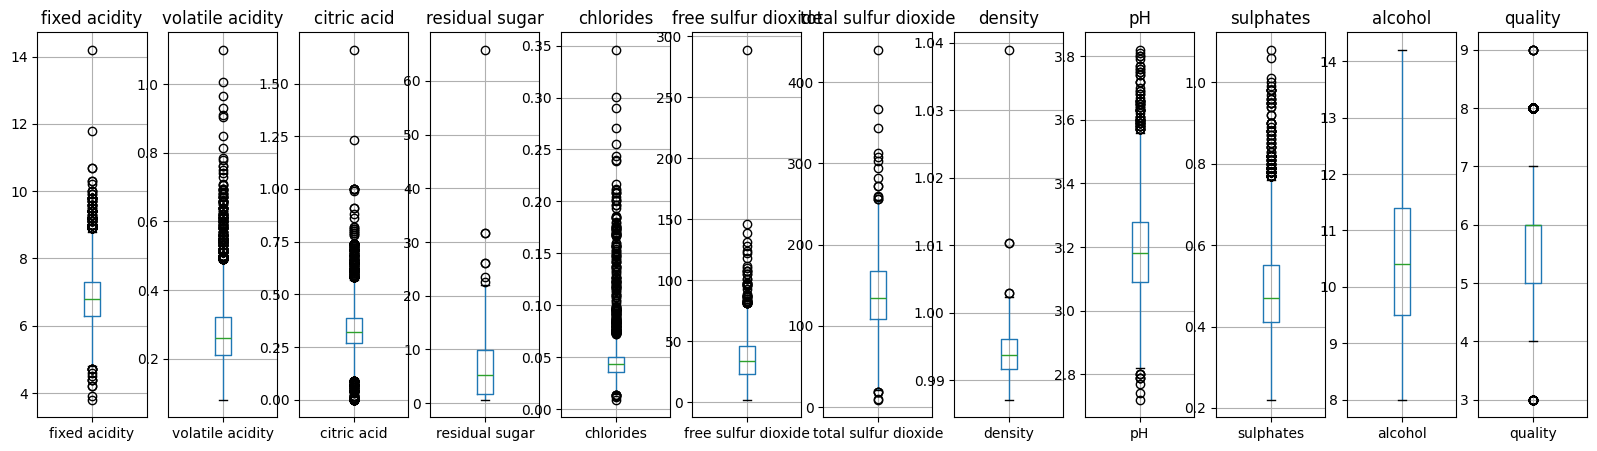

In [5]:
plot_boxplots(df)

In [6]:
#Function to remove outliers
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers[column_name]= df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_no_outliers

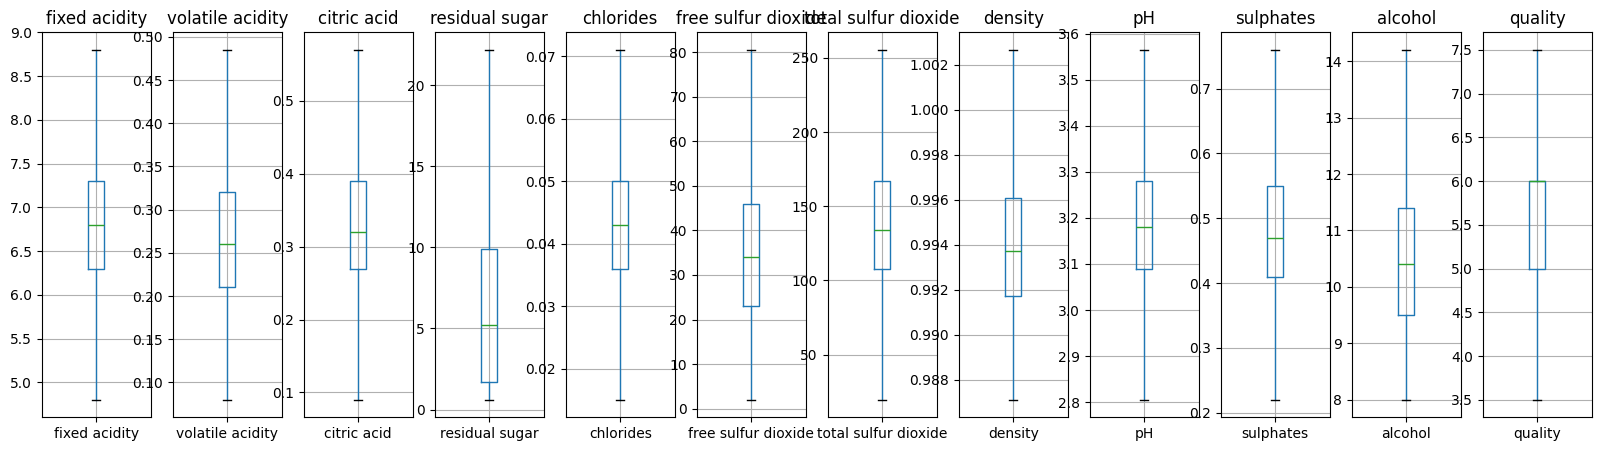

In [7]:
df = remove_outliers(df)
plot_boxplots(df)

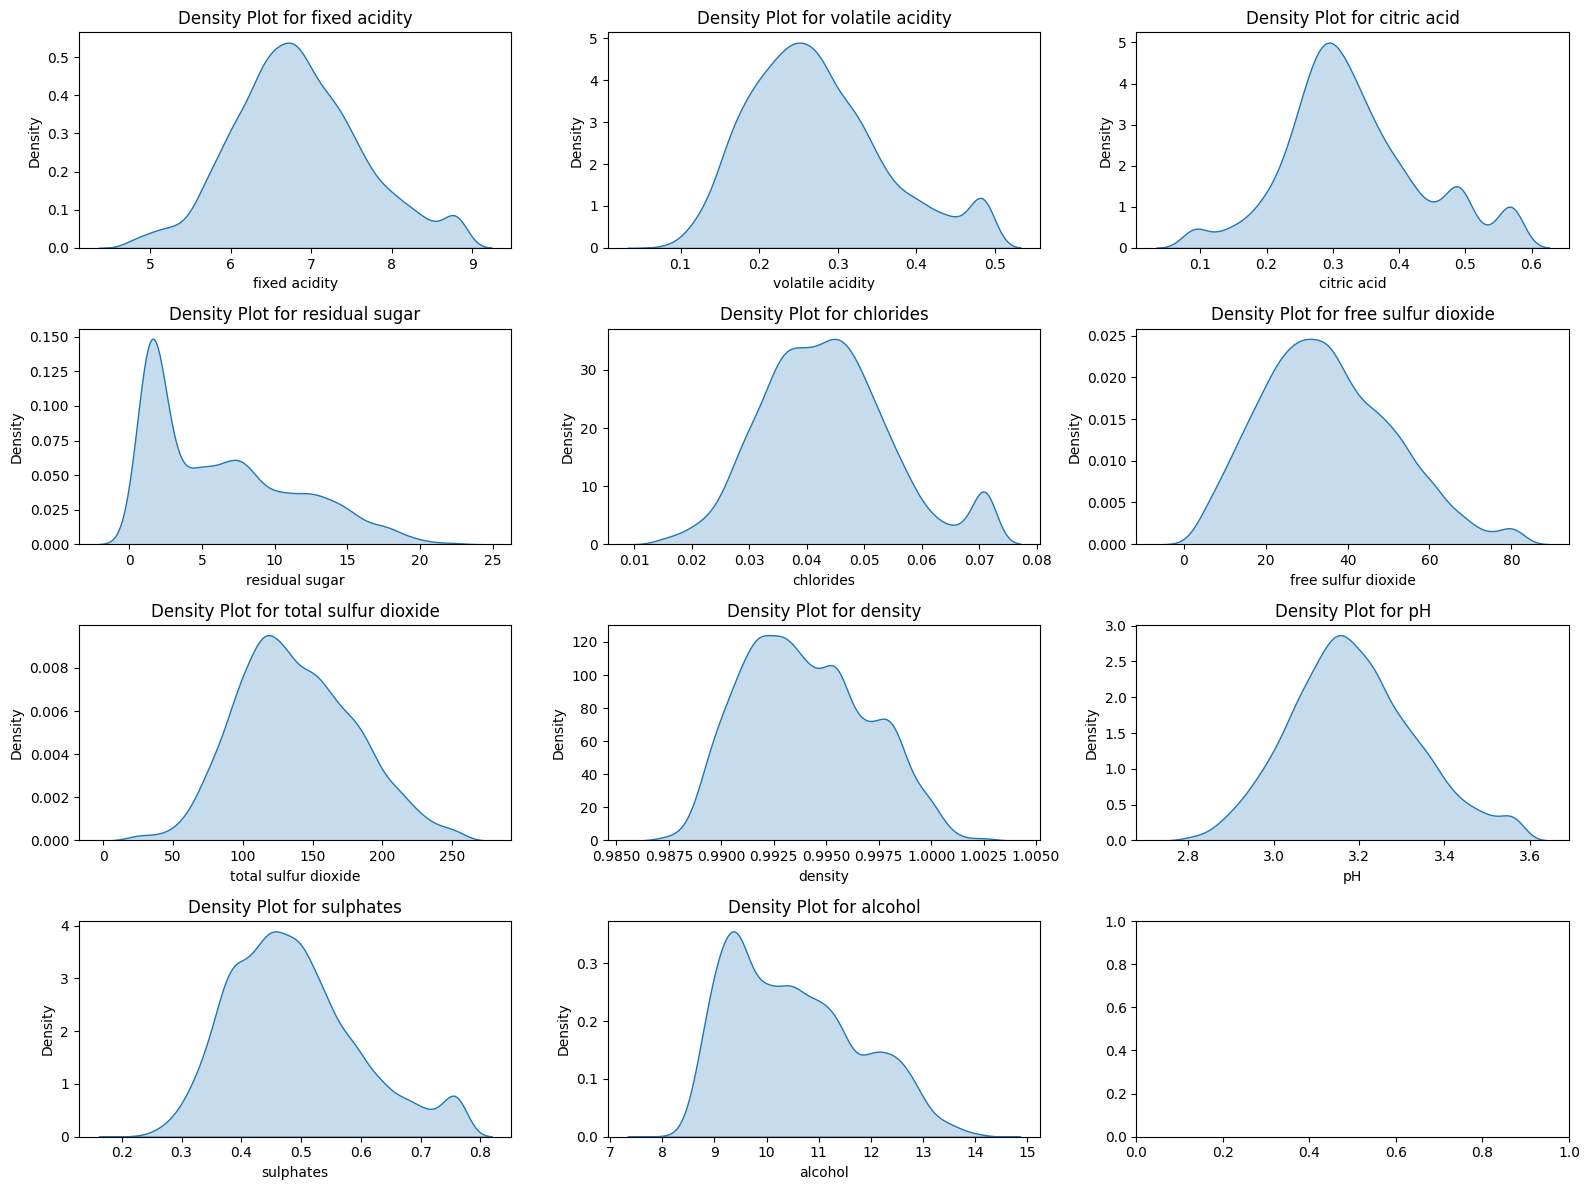

In [8]:
#Density plot of each features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))

for i, feature in enumerate(df.columns[:11]):
    ax = axes[i // 3, i % 3]
    sns.kdeplot(df[feature], ax=ax, fill=True)
    ax.set_title(f'Density Plot for {feature}')

plt.tight_layout()
plt.show()

In [9]:
#Correlation between dependent and independent features
corr = df.corr()
corr["quality"].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.439058
density                 0.319460
chlorides               0.297057
volatile acidity        0.192533
total sulfur dioxide    0.172497
fixed acidity           0.106870
pH                      0.102645
residual sugar          0.101681
sulphates               0.049761
free sulfur dioxide     0.025394
citric acid             0.001625
Name: quality, dtype: float64

In [10]:
#Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [12]:
#Splitting the datasets
split_index = len(df) * 7 // 10

#Split the data
train_data = df[:split_index]
test_data = df[split_index:]

**Training Dataset**

In [13]:
#Train Dataset
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,7.1,0.18,0.39,14.50,0.051,48.0,156.0,0.99947,3.35,0.76,9.1,5.0
3424,6.4,0.32,0.27,4.90,0.034,18.0,122.0,0.99160,3.36,0.71,12.5,6.0
3425,7.1,0.17,0.40,14.55,0.047,47.0,156.0,0.99945,3.34,0.76,9.1,6.0
3426,7.1,0.17,0.40,14.55,0.047,47.0,156.0,0.99945,3.34,0.76,9.1,6.0


In [14]:
#Occurence of each qualitities in train dataset
train_n_3 =train_data['quality'][train_data['quality']==3].count()
train_n_4 =train_data['quality'][train_data['quality']==4].count()
train_n_5 =train_data['quality'][train_data['quality']==5].count()
train_n_6 =train_data['quality'][train_data['quality']==6].count()
train_n_7 =train_data['quality'][train_data['quality']==7].count()
train_n_8 =train_data['quality'][train_data['quality']==8].count()
train_n_9 =train_data['quality'][train_data['quality']==9].count()
train_total_quality = train_data['quality'].count()

print('Train_n_3 =',train_n_3)
print('Train_n_4 =',train_n_4)
print('Train_n_5 =',train_n_5)
print('Train_n_6 =',train_n_6)
print('Train_n_7 =',train_n_7)
print('Train_n_8 =',train_n_8)
print('Train_n_9 =',train_n_9)
print('Total numbers of quality in train data: ',train_total_quality)

Train_n_3 = 0
Train_n_4 = 126
Train_n_5 = 1063
Train_n_6 = 1465
Train_n_7 = 618
Train_n_8 = 0
Train_n_9 = 0
Total numbers of quality in train data:  3428


In [15]:
#prob. of each qualaties for training
p_quality_4_train = train_n_4/train_total_quality
p_quality_5_train = train_n_5/train_total_quality
p_quality_6_train = train_n_6/train_total_quality
p_quality_7_train = train_n_7/train_total_quality

print('Prob. of quality 4 for training data= ',p_quality_4_train)
print('Prob. of quality 5 for training data= ',p_quality_5_train)
print('Prob. of quality 6 for training data= ',p_quality_6_train)
print('Prob. of quality 7 for training data= ',p_quality_7_train)

Prob. of quality 4 for training data=  0.0367561260210035
Prob. of quality 5 for training data=  0.31009334889148193
Prob. of quality 6 for training data=  0.4273628938156359
Prob. of quality 7 for training data=  0.18028004667444575


In [16]:
#finding the mean of each qualities for diffn. features by grouping them togeher for test data set
train_data_mean = train_data.groupby('quality').mean()

In [17]:
#finding the variance of each qualities for diffn. features by grouping them togeher for train data set
train_data_variance = train_data.groupby('quality').var()

In [18]:
#Mean of normally distributes features for quality 4
quality4_density_mean = train_data_mean['density'][train_data_variance.index == 4].values[0]
quality4_pH_mean = train_data_mean['pH'][train_data_variance.index == 4].values[0]
quality4_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 4].values[0]

In [19]:
#Mean of normally distributes features for quality 5
quality5_density_mean = train_data_mean['density'][train_data_variance.index == 5].values[0]
quality5_pH_mean = train_data_mean['pH'][train_data_variance.index == 5].values[0]
quality5_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 5].values[0]

In [20]:
#Mean of normally distributes features for quality 6
quality6_density_mean = train_data_mean['density'][train_data_variance.index == 6].values[0]
quality6_pH_mean = train_data_mean['pH'][train_data_variance.index == 6].values[0]
quality6_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 6].values[0]

In [21]:
#Mean of normally distributes features for quality 7
quality7_density_mean = train_data_mean['density'][train_data_variance.index == 7].values[0]
quality7_pH_mean = train_data_mean['pH'][train_data_variance.index == 7].values[0]
quality7_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 7].values[0]

In [22]:
#Var. of normally distributes features for quality 4
quality4_density_variance = train_data_variance['density'][train_data_variance.index == 4].values[0]
quality4_pH_variance = train_data_variance['pH'][train_data_variance.index == 4].values[0]
quality4_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 4].values[0]

In [23]:
#Var. of normally distributes features for quality 5
quality5_density_variance = train_data_variance['density'][train_data_variance.index == 5].values[0]
quality5_pH_variance = train_data_variance['pH'][train_data_variance.index == 5].values[0]
quality5_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 5].values[0]

In [24]:
#Var. of normally distributes features for quality 6
quality6_density_variance = train_data_variance['density'][train_data_variance.index == 6].values[0]
quality6_pH_variance = train_data_variance['pH'][train_data_variance.index == 6].values[0]
quality6_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 6].values[0]

In [25]:
#Var. of normally distributes features for quality 7
quality7_density_variance = train_data_variance['density'][train_data_variance.index == 7].values[0]
quality7_pH_variance = train_data_variance['pH'][train_data_variance.index == 7].values[0]
quality7_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 7].values[0]

In [26]:
#new data 
wine = pd.DataFrame()
wine['density'] = [1.001]
wine['pH'] = [3]
wine['alcohol'] = [8.8]

wine

,density,pH,alcohol
0,1.001,3,8.8


In [27]:
#Function to calculate conditional probability
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y))*np.exp((-(x-mean_y)**2)/(2*variance_y))
    return p

In [28]:
#posterior(Train quality 4)
p_quality_4_train * \
p_x_given_y(wine['density'][0],quality4_density_mean, quality4_density_variance) * \
p_x_given_y(wine['pH'][0],quality4_pH_mean, quality4_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality4_alcohol_mean, quality4_alcohol_variance)

0.04659386726958868

In [29]:
#posterior(Train quality 5)
p_quality_5_train * \
p_x_given_y(wine['density'][0],quality5_density_mean, quality5_density_variance) * \
p_x_given_y(wine['pH'][0],quality5_pH_mean, quality5_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality5_alcohol_mean, quality5_alcohol_variance) 

1.4880043365997182

In [30]:
#posterior(Train quality 6)
p_quality_6_train * \
p_x_given_y(wine['density'][0],quality6_density_mean, quality6_density_variance) * \
p_x_given_y(wine['pH'][0],quality6_pH_mean, quality6_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality6_alcohol_mean, quality6_alcohol_variance) 

0.41769570251948834

In [31]:
#posterior(Train quality 7)
p_quality_7_train * \
p_x_given_y(wine['density'][0],quality7_density_mean, quality7_density_variance) * \
p_x_given_y(wine['pH'][0],quality7_pH_mean, quality7_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality7_alcohol_mean, quality7_alcohol_variance) 

0.009110545011168442

In [52]:
# Unnormalized posterior probabilities
unnormalized_probs = np.array([0.04659386726958868,1.4880043365997182 ,0.41769570251948834,0.009110545011168442])

# Calculate the sum of probabilities
sum_probs = np.sum(unnormalized_probs)

# Normalize probabilities
normalized_probs = unnormalized_probs / sum_probs

# Print the results
qualities = ['Quality 4', 'Quality 5', 'Quality 6', 'Quality 7']
print("Normalized probabilities:")
for quality, prob in zip(qualities, normalized_probs):
    print(f"{quality}: {prob:.3f}")

# Verify that the sum of normalized probabilities is 1
print(f"\nSum of normalized probabilities: {np.sum(normalized_probs):.3f}")

Normalized probabilities:
Quality 4: 0.024
Quality 5: 0.759
Quality 6: 0.213
Quality 7: 0.005

Sum of normalized probabilities: 1.000


**Test Data**

In [32]:
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3428,6.4,0.32,0.27,4.90,0.034,18.0,122.0,0.99160,3.36,0.71,12.5,6.0
3429,7.1,0.18,0.39,14.50,0.051,48.0,156.0,0.99947,3.35,0.76,9.1,5.0
3430,7.1,0.17,0.40,14.55,0.047,47.0,156.0,0.99945,3.34,0.76,9.1,6.0
3431,7.1,0.18,0.39,15.25,0.047,45.0,158.0,0.99946,3.34,0.76,9.1,6.0
3432,7.8,0.29,0.29,3.15,0.044,41.0,117.0,0.99153,3.24,0.35,11.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [33]:
#Occurence of each qualitities in test dataset
test_n_3 =test_data['quality'][test_data['quality']==3].count()
test_n_4 =test_data['quality'][test_data['quality']==4].count()
test_n_5 =test_data['quality'][test_data['quality']==5].count()
test_n_6 =test_data['quality'][test_data['quality']==6].count()
test_n_7 =test_data['quality'][test_data['quality']==7].count()
test_n_8 =test_data['quality'][test_data['quality']==8].count()
test_n_9 =test_data['quality'][test_data['quality']==9].count()
test_total_quality = test_data['quality'].count()

print('Test_n_3 =',test_n_3)
print('Test_n_4 =',test_n_4)
print('Test_n_5 =',test_n_5)
print('Test_n_6 =',test_n_6)
print('Test_n_7 =',test_n_7)
print('Test_n_8 =',test_n_8)
print('Test_n_9 =',test_n_9)
print('Total numbers of quality in test data: ',test_total_quality)

Test_n_3 = 0
Test_n_4 = 37
Test_n_5 = 394
Test_n_6 = 733
Test_n_7 = 262
Test_n_8 = 0
Test_n_9 = 0
Total numbers of quality in test data:  1470


In [34]:
#prob. of each qualities for test data set
p_quality_4_test = test_n_4/test_total_quality
p_quality_5_test = test_n_5/test_total_quality
p_quality_6_test = test_n_6/test_total_quality
p_quality_7_test = test_n_7/test_total_quality

print('Prob. of quality 4 for test data= ',p_quality_4_test)
print('Prob. of quality 5 for test data= ',p_quality_5_test)
print('Prob. of quality 6 for test data= ',p_quality_6_test)
print('Prob. of quality 7 for test data= ',p_quality_7_test)

Prob. of quality 4 for test data=  0.025170068027210883
Prob. of quality 5 for test data=  0.2680272108843537
Prob. of quality 6 for test data=  0.49863945578231295
Prob. of quality 7 for test data=  0.1782312925170068


In [35]:
#finding the mean of each qualities for diffn. features by grouping them togeher for test data set
test_data_mean = test_data.groupby('quality').mean()

In [36]:
#finding the variance of each qualities for diffn. features by grouping them togeher for test data set
test_data_variance = test_data.groupby('quality').var()

In [37]:
#Mean of normally distributes features for quality 4
quality4_density_mean_test = test_data_mean['density'][test_data_variance.index == 4].values[0]
quality4_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 4].values[0]
quality4_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 4].values[0]

In [38]:
#Mean of normally distributes features for quality 5
quality5_density_mean_test = test_data_mean['density'][test_data_variance.index == 5].values[0]
quality5_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 5].values[0]
quality5_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 5].values[0]

In [39]:
#Mean of normally distributes features for quality 6
quality6_density_mean_test = test_data_mean['density'][test_data_variance.index == 6].values[0]
quality6_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 6].values[0]
quality6_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 6].values[0]

In [40]:
#Mean of normally distributes features for quality 7
quality7_density_mean_test = test_data_mean['density'][test_data_variance.index == 7].values[0]
quality7_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 7].values[0]
quality7_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 7].values[0]

In [41]:
#Var. of normally distributes features for quality 4

quality4_density_variance_test = test_data_variance['density'][test_data_variance.index == 4].values[0]
quality4_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 4].values[0]
quality4_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 4].values[0]

In [42]:
#Var. of normally distributes features for quality 5
quality5_density_variance_test = test_data_variance['density'][test_data_variance.index == 5].values[0]
quality5_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 5].values[0]
quality5_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 5].values[0]

In [43]:
#Var. of normally distributes features for quality 6
quality6_density_variance_test = test_data_variance['density'][test_data_variance.index == 6].values[0]
quality6_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 6].values[0]
quality6_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 6].values[0]

In [44]:
#Var. of normally distributes features for quality 7
quality7_density_variance_test = test_data_variance['density'][test_data_variance.index == 7].values[0]
quality7_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 7].values[0]
quality7_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 7].values[0]

In [45]:
#posterior(Test quality 4)
p_quality_4_test * \
p_x_given_y(wine['density'][0],quality4_density_mean_test, quality4_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality4_pH_mean_test, quality4_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality4_alcohol_mean_test, quality4_alcohol_variance_test)

8.898347957681985e-05

In [46]:
#posterior(Test quality 5)
p_quality_5_test * \
p_x_given_y(wine['density'][0],quality5_density_mean_test, quality5_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality5_pH_mean_test, quality5_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality5_alcohol_mean_test, quality5_alcohol_variance_test) 

0.5038353265534522

In [47]:
#posterior(Test quality 6)
p_quality_6_test * \
p_x_given_y(wine['density'][0],quality6_density_mean_test, quality6_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality6_pH_mean_test, quality6_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality6_alcohol_mean_test, quality6_alcohol_variance_test) 

0.184788622158285

In [48]:
#posterior(Test quality 7)
p_quality_7_test * \
p_x_given_y(wine['density'][0],quality7_density_mean_test, quality7_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality7_pH_mean_test, quality7_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality7_alcohol_mean_test, quality7_alcohol_variance_test) 

0.004739717647394934

In [54]:
# Unnormalized posterior probabilities
unnormalized_probs = np.array([0.05996, 0.5038353265534522,0.184788622158285,0.004739717647394934])

# Calculate the sum of probabilities
sum_probs = np.sum(unnormalized_probs)

# Normalize probabilities
normalized_probs = unnormalized_probs / sum_probs

# Print the results
qualities = ['Quality 4', 'Quality 5', 'Quality 6', 'Quality 7']
print("Normalized probabilities:")
for quality, prob in zip(qualities, normalized_probs):
    print(f"{quality}: {prob:.3f}")

# Verify that the sum of normalized probabilities is 1
print(f"\nSum of normalized probabilities: {np.sum(normalized_probs):.3f}")

Normalized probabilities:
Quality 4: 0.080
Quality 5: 0.669
Quality 6: 0.245
Quality 7: 0.006

Sum of normalized probabilities: 1.000


**KNN**

In [49]:
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return distance ** 0.5

In [50]:
def knn(training_data, test_point, k):
    distances = []
    
    # Calculate the distance from the test point to all training points
    for index, data in training_data.iterrows():
        point, label = data[:-1], data[-1]  # point = [density, pH, alcohol], label = quality
        dist = euclidean_distance(point, test_point)
        distances.append((dist, label))
    
    # Sort the distances list by distance
    distances.sort(key=lambda x: x[0])
    
    # Get the labels of the k nearest neighbors
    neighbors = [distances[i][1] for i in range(k)]
    
    # Return the majority label
    return max(set(neighbors), key=neighbors.count)

In [51]:
# Training data: df_knn = train_data[['density','pH','alcohol','quality']]
df_knn = train_data[['density', 'pH', 'alcohol', 'quality']]

# Test data: test_df_knn = wine[['density','pH','alcohol']]
test_df_knn = wine[['density', 'pH', 'alcohol']]

# Set the number of neighbors
k = 3

# Predicting the quality for each test data point
predicted_labels = []
for index, test_point in test_df_knn.iterrows():
    predicted_label = knn(df_knn, test_point, k)
    predicted_labels.append(predicted_label)

# Output the predicted labels for the test set
print('The predicted quality for the new dataset is: ',predicted_labels)


C:\Users\Swayam\AppData\Local\Temp\ipykernel_15468\2060776779.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  point, label = data[:-1], data[-1]  # point = [density, pH, alcohol], label = quality
C:\Users\Swayam\AppData\Local\Temp\ipykernel_15468\614956954.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += (point1[i] - point2[i]) ** 2


The predicted quality for the new dataset is:  [6.0]
